<a href="https://colab.research.google.com/github/my-roki/KOSA_Fpht/blob/master/z_project/Keras_Architecture_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###part 0
from tensorflow.keras import Input, layers, models
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.applications import VGG19

import numpy as np

In [2]:
input_tensor = Input(shape=(128, 128, 3), dtype='float32', name='input')

#vgg16 모델 불러오기
pre_trained_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [4]:
# vgg19 밑에 레이어 추가
from tensorflow import keras

model = models.Sequential()
model.add(pre_trained_vgg)
model.add(layers.Flatten())
model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_acc',
                                                patience = 5),
                 keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                    monitor = 'val_loss',
                                                    save_best_only = True)]

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [5]:
### part 2

X_train, X_test, y_train, y_test = np.load('2ndtrial.npy', allow_pickle=True)

print(X_train.shape)

X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

history = model.fit(X_train, y_train, batch_size = 16, epochs = 50, callbacks=callbacks_list, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test)

(640, 128, 128, 3)
Epoch 1/50
40/40 [==============================] - 5s 119ms/step - loss: 470.3420 - acc: 0.6281 - val_loss: 401.8053 - val_acc: 0.9299
Epoch 2/50
40/40 [==============================] - 4s 106ms/step - loss: 345.8268 - acc: 0.8734 - val_loss: 289.6564 - val_acc: 0.9813
Epoch 3/50
40/40 [==============================] - 4s 100ms/step - loss: 242.5029 - acc: 0.9500 - val_loss: 196.2396 - val_acc: 0.9953
Epoch 4/50
40/40 [==============================] - 5s 123ms/step - loss: 160.2974 - acc: 0.9594 - val_loss: 125.9767 - val_acc: 1.0000
Epoch 5/50
40/40 [==============================] - 5s 133ms/step - loss: 101.5354 - acc: 0.9750 - val_loss: 79.6118 - val_acc: 1.0000
Epoch 6/50
40/40 [==============================] - 11s 287ms/step - loss: 66.9829 - acc: 0.9641 - val_loss: 55.4943 - val_acc: 1.0000
Epoch 7/50
40/40 [==============================] - 11s 283ms/step - loss: 47.8224 - acc: 0.9438 - val_loss: 40.4327 - val_acc: 0.9393
Epoch 8/50
40/40 [==============

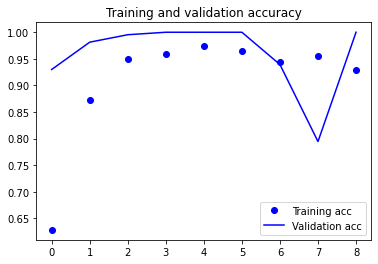

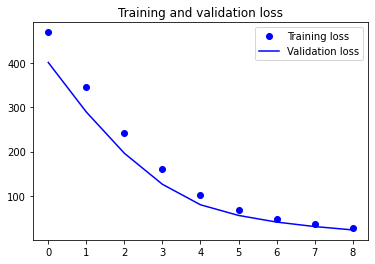

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('frame116.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.94305485, 0.01186753, 0.02293049, 0.02214711]], dtype=float32)

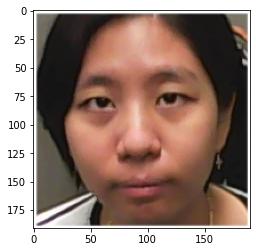

In [10]:
import cv2
import matplotlib.pyplot as plt

test1 = cv2.imread("frame12.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [11]:
img = image.load_img('frame17.jpg', target_size=(128, 128))
img
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00134587, 0.9749414 , 0.01159128, 0.01212147]], dtype=float32)

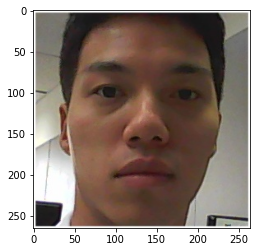

In [12]:
test1 = cv2.imread("frame17.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [13]:
img = image.load_img('frame594.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.02334466, 0.00167247, 0.97347623, 0.00150659]], dtype=float32)

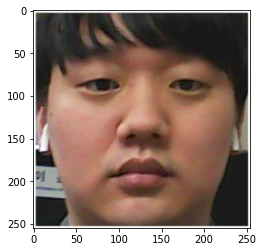

In [14]:
test1 = cv2.imread("frame594.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [15]:
img = image.load_img('frame23.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00289255, 0.00369111, 0.00146184, 0.9919545 ]], dtype=float32)

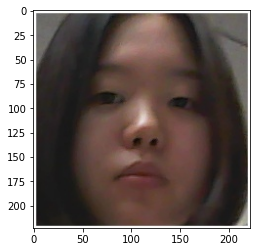

In [16]:
test1 = cv2.imread("frame23.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [17]:
model.save("model.h5")

In [18]:
### part 4

from tensorflow.keras.models import Sequential, load_model

model = load_model('model.h5')

img = image.load_img('frame12.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.99075234, 0.00249901, 0.00512066, 0.00162796]], dtype=float32)

In [19]:
img = image.load_img('frame17.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00134587, 0.9749414 , 0.01159128, 0.01212147]], dtype=float32)

In [20]:
img = image.load_img('frame594.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.02334466, 0.00167247, 0.97347623, 0.00150659]], dtype=float32)

In [21]:
img = image.load_img('frame23.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00289255, 0.00369111, 0.00146184, 0.9919545 ]], dtype=float32)